## 4. Feature processing

Session Level features:  
- No of sessions
- Average length of session
- Averge number of items in session
- Average no of different page visits (adverts, thumbs up, thumbs down etc) in a session
  
User level features:
- Days since registering
- Total no of different page visits (adverts, thumbs up, thumbs down etc) in a session
- Level
- Gender
- State
  
Label:
- churn

In [258]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split

# impute
from sklearn.impute import SimpleImputer

# pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler



In [2]:
df_hi = pd.read_parquet('../data/1_interim/1_merged_data.parquet')
df_hi.head()

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,...,post_area_code,postcode_area,postcode_area_name,sal_lower,sal_upper,sal_freq,sal_currency,sal_togbp_rate,sal_toyearly_factor,sal_mid_gbp
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,...,EH,EH,Edinburgh,18109.00,18109.00,yearly,GBP,1.0,1.0,18109.00
1,2.764970e+12,None,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,...,LS,LS,Leeds,16945.00,16945.00,yearly,GBP,1.0,1.0,16945.00
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,...,EH,EH,Edinburgh,729.87,729.87,pw,GBP,1.0,52.0,37953.24
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,...,EH,EH,Edinburgh,19087.00,19087.00,yearly,GBP,1.0,1.0,19087.00
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,...,SN,SN,Swindon,2741.50,2741.50,per month,GBP,1.0,12.0,32898.00


In [14]:
df_hi.columns

Index(['participant_id', 'name_title', 'first_name', 'last_name', 'age',
       'postcode', 'marital_status', 'education', 'job_title',
       'occupation_level', 'education_num', 'familiarity_FB', 'view_FB',
       'interested_insurance', 'company_email', 'created_account', 'full_name',
       'dob', 'town', 'paye', 'salary_band', 'years_with_employer',
       'months_with_employer', 'hours_per_week', 'capital_gain',
       'capital_loss', 'new_mortgage', 'sex', 'religion', 'relationship',
       'race', 'native_country', 'workclass', 'demographic_characteristic',
       'duplicated', 'dob_yr', 'campaign_yr', 'post_area_code',
       'postcode_area', 'postcode_area_name', 'sal_lower', 'sal_upper',
       'sal_freq', 'sal_currency', 'sal_togbp_rate', 'sal_toyearly_factor',
       'sal_mid_gbp', 'time_with_employer'],
      dtype='object')

In [3]:
df_hi['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [4]:
df_hi['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', None, 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [5]:
df_hi['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [6]:
df_hi['job_title'].unique()

array(['Furniture conservator/restorer', 'Administrator, sports',
       'Armed forces training and education officer',
       'Facilities assistant', 'Information systems manager',
       'Buyer, retail', 'Construction Worker', 'Assistant Professor',
       'Insurance broker', 'Development worker, international aid',
       'Local government officer', 'Gaffer', 'Colour technologist',
       'Designer, multimedia', 'Cartographer', 'Acupuncturist',
       'Engineer, control and instrumentation', 'Dispensing optician',
       'Equality and diversity officer', 'Engineer, manufacturing',
       'Insurance Lead Underwritor', 'Legal executive', 'Interpreter',
       'Games developer', 'Heritage manager',
       'Professorial Research Fellow', 'Health visitor', 'Data Scientist',
       'Scientist, research (life sciences)',
       'Education officer, community', 'Conservator, museum/gallery',
       'Event organiser', 'Horticultural therapist',
       'Health and safety inspector', 'Human res

In [7]:
df_hi['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', None, 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc'], dtype=object)

## Features to include and pre-process

`'created_account'` - target variable - binary classification

`'age'` - numeric, continous (discrete)  
`'sex'` - categorical with 2 values - as boolean 0/1  
`'religion'` - categorical, non-ordinal one-hot encoding   
`'relationship'` - categorical, non-ordinal one-hot encoding  

`'education'` - categorical, ordinal encoded with integers  
`'education_num'`  
`'occupation_level'`  

`'sal_mid_gbp'` - numeric, continous

`'new_mortgage'` - categorical with 2 values - as boolean 0/1  

`years_with_employer` + `months_with_employer` - numerical continous feature as decimal years  
`hours_per_week`

In [45]:
df_hi[['education', 'education_num']].drop_duplicates().sort_values('education_num')

,education,education_num
224,Preschool,1
160,1st-4th,3
57,5th-6th,4
15,7th-8th,5
6,9th,6
77,10th,8
3,11th,9
414,12th,10
2,HS-grad,12
10,Some-college,13


In [50]:
df_hi[['education', 'education_num', 'occupation_level']].drop_duplicates().sort_values('education_num')

,education,education_num,occupation_level
2956,Preschool,1,8
224,Preschool,1,7
934,Preschool,1,13
2682,1st-4th,3,12
1917,1st-4th,3,4
...,...,...,...
96,Doctorate,21,10
89,Doctorate,21,8
65,Doctorate,21,14
1076,Doctorate,21,18


## Feature Engineering

In [8]:
df_hi['time_with_employer'] = df_hi['years_with_employer'] + df_hi['months_with_employer']/12
df_hi[['time_with_employer', 'years_with_employer', 'months_with_employer']]

,time_with_employer,years_with_employer,months_with_employer
0,20.500000,20.0,6.0
1,28.083333,28.0,1.0
2,14.416667,14.0,5.0
3,32.500000,32.0,6.0
4,3.500000,3.0,6.0
...,...,...,...
3031,2.250000,2.0,3.0
3032,8.250000,8.0,3.0
3033,2.666667,2.0,8.0
3034,0.416667,0.0,5.0


In [169]:
cat_cols = ['relationship', 'sex', 'religion']
num_cols = ['age', 'education_num', 'occupation_level','time_with_employer', 'hours_per_week']
target_col = 'created_account'

feature_cols = cat_cols + num_cols + [target_col]

df_hi[feature_cols].isna().any()

relationship           True
sex                    True
religion               True
age                   False
education_num         False
occupation_level      False
time_with_employer     True
hours_per_week         True
created_account       False
dtype: bool

<AxesSubplot: ylabel='Frequency'>

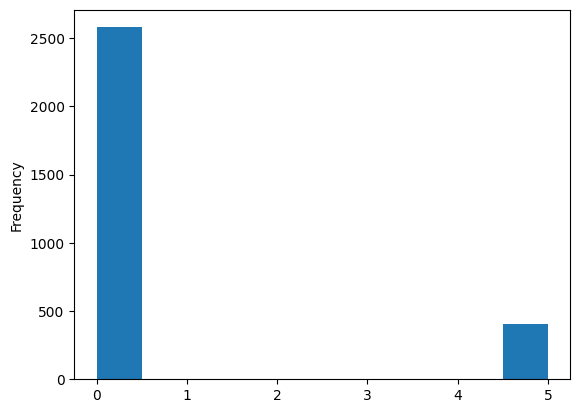

In [170]:
df_hi[feature_cols].isna().sum(1).plot(kind='hist')

In [171]:
# drop rows with 5 missing values
df_hi.loc[df_hi[feature_cols].isna().sum(1)==5, feature_cols].head()

,relationship,sex,religion,age,education_num,occupation_level,time_with_employer,hours_per_week,created_account
8,None,None,None,31,18,12,NaN,NaN,Yes
12,None,None,None,23,17,10,NaN,NaN,No
19,None,None,None,43,18,6,NaN,NaN,No
29,None,None,None,39,12,5,NaN,NaN,No
38,None,None,None,19,12,10,NaN,NaN,No


In [172]:
df_hi_clean = df_hi.drop(df_hi[df_hi[feature_cols].isna().sum(1)==5].index)
df_hi_clean['created_account'].value_counts()

No     2367
Yes     213
Name: created_account, dtype: int64

In [173]:
df_hi_clean['created_account'].value_counts(normalize=True)

No     0.917442
Yes    0.082558
Name: created_account, dtype: float64

## Train-test split
This has to be done before fitting any predictors to avoid data-leakage

In [174]:
X = df_hi_clean[feature_cols[:-1]]
y = df_hi_clean[feature_cols[-1]]

In [178]:
X.isna().any().any()

False

# Train-Test split

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [216]:
y_train.value_counts(normalize=True)

No     0.917829
Yes    0.082171
Name: created_account, dtype: float64

## Impute
No imputation needed, there's no missing value

In [217]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [218]:
X_train.isna().any().any()

False

## Transform

In [219]:
oh_encoder = OneHotEncoder(drop='first', sparse=False)

In [220]:
oh_encoder.fit(X_train[cat_cols])

OneHotEncoder(drop='first', sparse=False)

In [221]:
# pd.concat([X_train[num_cols], pd.DataFrame(oh_encoder.transform(X_train[cat_cols]).toarray(),
#              columns=oh_encoder.get_feature_names_out())], axis=0, ignore_index=True)

X_train[oh_encoder.get_feature_names_out()] = oh_encoder.transform(X_train[cat_cols]) #.toarray()
X_train.drop(columns=cat_cols, inplace=True)

In [222]:
X_train.isna().any().any()

False

In [223]:
X_train.head()

,age,education_num,occupation_level,time_with_employer,hours_per_week,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Male,religion_Christianity,religion_Hinduism,religion_Islam,religion_Judaism,religion_Not Stated,religion_Other religions,religion_Sikhism
2822,24,13,3,4.083333,24.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
975,37,12,4,1.583333,40.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
207,35,12,10,12.750000,60.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
490,46,12,6,0.833333,40.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3008,38,12,4,1.083333,30.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


__Scale__

In [224]:
scaler = StandardScaler()

In [225]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,age,education_num,occupation_level,time_with_employer,hours_per_week,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Male,religion_Christianity,religion_Hinduism,religion_Islam,religion_Judaism,religion_Not Stated,religion_Other religions,religion_Sikhism
2822,-1.097746,-0.059087,-1.228493,-0.274960,-1.416246,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
975,-0.131654,-0.363973,-0.968270,-0.645355,-0.068932,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
207,-0.280284,-0.363973,0.593066,1.009075,1.615210,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
490,0.537179,-0.363973,-0.447825,-0.756473,-0.068932,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3008,-0.057340,-0.363973,-0.968270,-0.719434,-0.911004,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modelling

In [245]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve

In [246]:
models = [SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), LogisticRegression()]

In [248]:
trained_models = []

for model in models:
    model = model.fit(X_train, y_train.map({'No':0, 'Yes':1}))
    
    pred_train = model.predict(X_train)
#     pred_test = model.transform(X_test)
    
    # Evaluate Accuracy
    train_accuracy = accuracy_score(y_train.map({'No':0, 'Yes':1}), pred_train)
#     test_accuracy = accuracy_evaluator.evaluate(pred_test.select(col('label'), col('prediction')))
    
    # Evaluate F1 score
    train_f1 = f1_score(y_train.map({'No':0, 'Yes':1}), pred_train)
#     test_f1 = f1_evaluator.evaluate(pred_test.select(col('label'), col('prediction')))
    
    # Output
    model_name = model.__repr__().split(':')[0]
#     print(f'{model_name}:\t TRA: {train_accuracy:.2%},\t TSA: {test_accuracy:.2%}\t TRF1: {train_f1:.2%},\t TSF1: {test_f1:.2%}')
    print(f'{model_name}:\t TRA: {train_accuracy:.2%},\t TRF1: {train_f1:.2%}')
#     model_evals.append([model_name, train_accuracy, test_accuracy, train_f1, test_f1])
    trained_models.append(model)

SVC():	 TRA: 91.78%,	 TRF1: 0.00%
DecisionTreeClassifier():	 TRA: 100.00%,	 TRF1: 100.00%
RandomForestClassifier():	 TRA: 100.00%,	 TRF1: 100.00%
GaussianNB():	 TRA: 34.94%,	 TRF1: 19.96%
LogisticRegression():	 TRA: 91.99%,	 TRF1: 25.84%


In [251]:
trained_models[2].feature_importances_


array([0.18835772, 0.14310041, 0.21624461, 0.21015056, 0.11541485,
       0.02342761, 0.00104671, 0.0083282 , 0.00808896, 0.01085031,
       0.01726623, 0.02054806, 0.00807976, 0.01250449, 0.00138443,
       0.01395751, 0.0003192 , 0.00093038])

In [254]:
forest = trained_models[2]

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [256]:
forest.feature_names_in_

array(['age', 'education_num', 'occupation_level', 'time_with_employer',
       'hours_per_week', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'sex_Male',
       'religion_Christianity', 'religion_Hinduism', 'religion_Islam',
       'religion_Judaism', 'religion_Not Stated',
       'religion_Other religions', 'religion_Sikhism'], dtype=object)

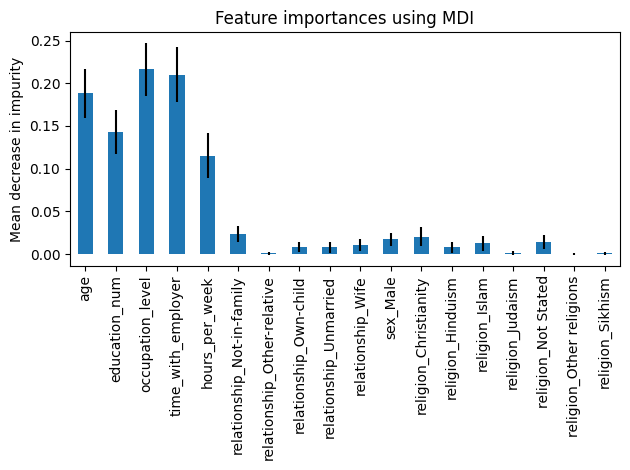

In [259]:
forest_importances = pd.Series(importances, index=forest.feature_names_in_)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [236]:
print('f1: ', f1_score(y_train.map({'No':0, 'Yes':1}), y_train_pred))
print('recall: ', recall_score(y_train.map({'No':0, 'Yes':1}), y_train_pred))
print('recall: ', recall_score(y_train.map({'No':0, 'Yes':1}), y_train_pred))

print(confusion_matrix(y_train.map({'No':0, 'Yes':1}), y_train_pred, labels=[0, 1]))
print(confusion_matrix(y_train, y_train))

f1:  0.2583732057416268
recall:  0.16981132075471697
recall:  0.16981132075471697
[[1753   23]
 [ 132   27]]
[[1776    0]
 [   0  159]]


In [237]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.map({'No':0, 'Yes':1}))

y_train_pred = rfc.predict(X_train)

print('f1: ', f1_score(y_train.map({'No':0, 'Yes':1}), y_train_pred))
print('recall: ', recall_score(y_train.map({'No':0, 'Yes':1}), y_train_pred))
print('recall: ', recall_score(y_train.map({'No':0, 'Yes':1}), y_train_pred))

print(confusion_matrix(y_train.map({'No':0, 'Yes':1}), y_train_pred, labels=[0, 1]))
print(confusion_matrix(y_train, y_train))

f1:  1.0
recall:  1.0
recall:  1.0
[[1776    0]
 [   0  159]]
[[1776    0]
 [   0  159]]


In [240]:
rfc.predict_proba(X_train)

array([[1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [242]:
nb = GaussianNB()
nb.fit(X_train, y_train.map({'No':0, 'Yes':1}))

y_train_pred = nb.predict(X_train)

print('f1: ', f1_score(y_train.map({'No':0, 'Yes':1}), y_train_pred))
print('recall: ', recall_score(y_train.map({'No':0, 'Yes':1}), y_train_pred))
print('precision: ', precision_score(y_train.map({'No':0, 'Yes':1}), y_train_pred))

print(confusion_matrix(y_train.map({'No':0, 'Yes':1}), y_train_pred, labels=[0, 1]))
print(confusion_matrix(y_train, y_train))

f1:  0.19961856325492688
recall:  0.9874213836477987
precision:  0.11103253182461104
[[ 519 1257]
 [   2  157]]
[[1776    0]
 [   0  159]]
